In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
insurance_df = pd.read_csv('insurance.csv')
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
insurance_df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [ ]:
insurance_df.shape

(1338, 7)

In [ ]:
insurance_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
insurance_df.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


In [ ]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
insurance_df.duplicated().any()

True

In [ ]:
insurance_df[insurance_df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [ ]:
insurance_df1 = insurance_df.drop_duplicates()

In [ ]:
insurance_df1.shape

(1337, 7)

In [ ]:
insurance_df1.isnull().any()

,0
age,False
sex,False
bmi,False
children,False
smoker,False
region,False
charges,False


In [ ]:
insurance_df1.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
Numerical_columns = insurance_df1.select_dtypes(include = "number").columns.to_list()
Categorical_columns = insurance_df1.select_dtypes(exclude= "number").columns.to_list()
print("these are the numerical numbers", Numerical_columns)
print("these are the categorical numbers", Categorical_columns)

these are the numerical numbers ['age', 'bmi', 'children', 'charges']
these are the categorical numbers ['sex', 'smoker', 'region']


In [ ]:
insurance_df1.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
insurance_df1.describe(exclude = "number")

,sex,smoker,region
count,1337,1337,1337
unique,2,2,4
top,male,no,southeast
freq,675,1063,364


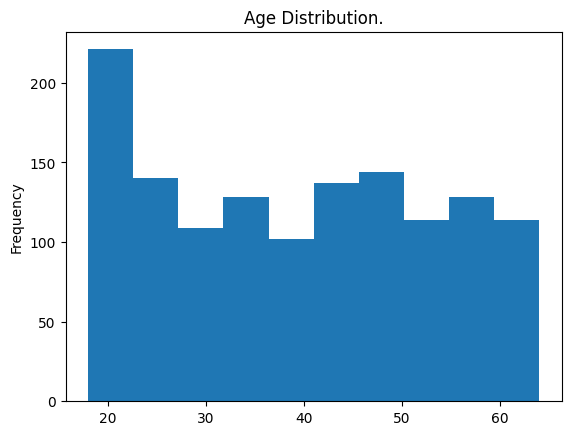

In [ ]:
insurance_df1['age'].plot(kind = 'hist')
plt.title("Age Distribution.")
plt.show()

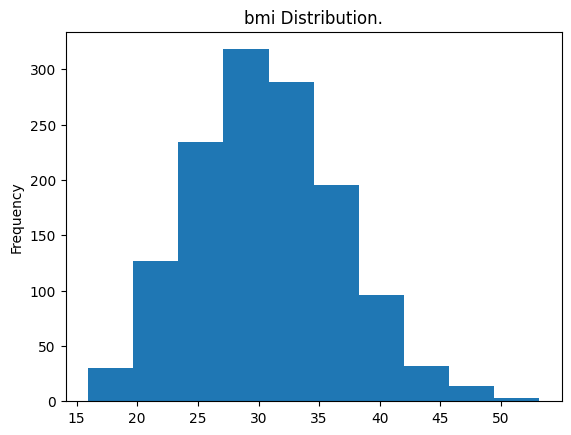

In [ ]:
insurance_df1['bmi'].plot(kind = 'hist')
plt.title("bmi Distribution.")
plt.show()

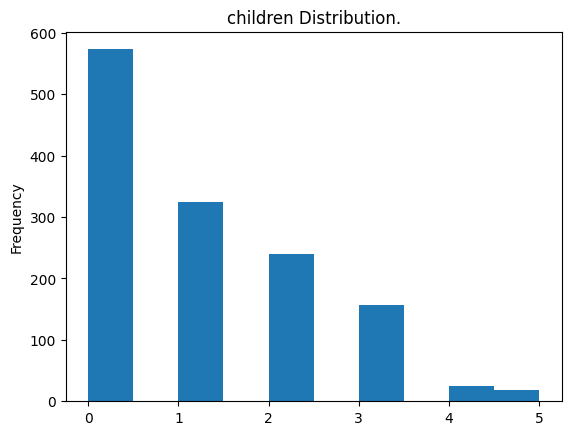

In [ ]:
insurance_df1['children'].plot(kind = 'hist')
plt.title("children Distribution.")
plt.show()

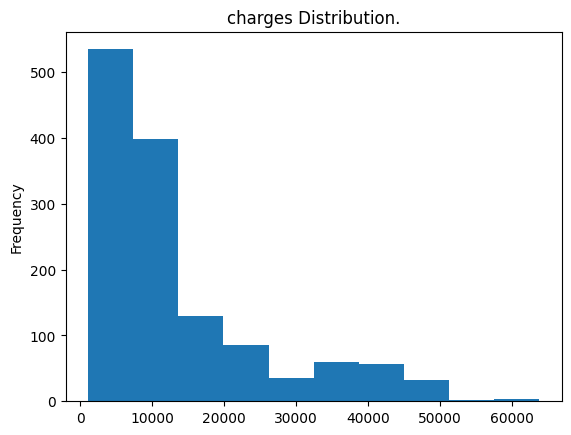

In [ ]:
insurance_df1['charges'].plot(kind = 'hist')
plt.title("charges Distribution.")
plt.show()

<Axes: xlabel='sex'>

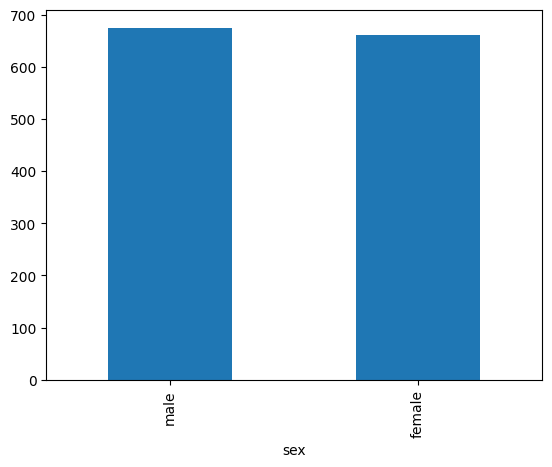

In [ ]:
insurance_df1['sex'].value_counts().plot(kind = 'bar')

<Axes: xlabel='smoker'>

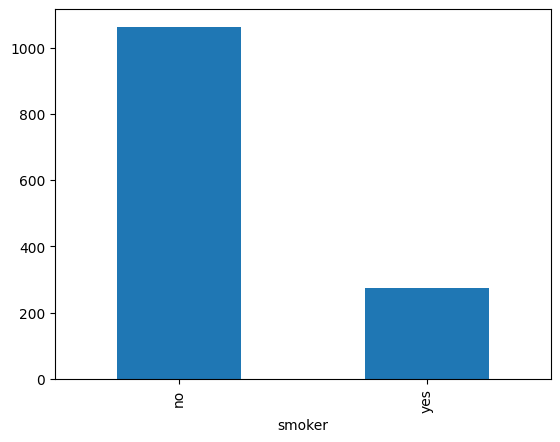

In [ ]:
insurance_df1['smoker'].value_counts().plot(kind = 'bar')

<Axes: xlabel='region'>

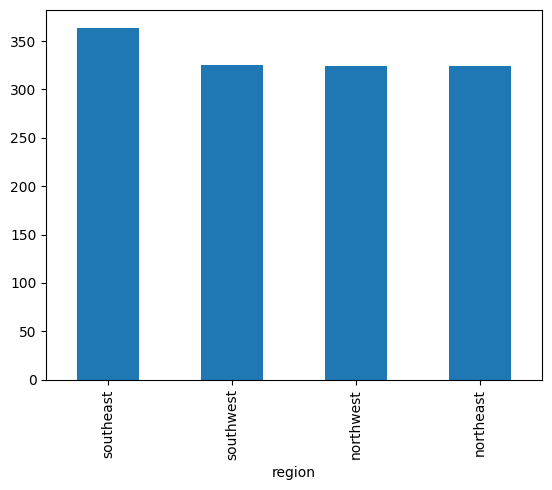

In [ ]:
insurance_df1['region'].value_counts().plot(kind = 'bar')

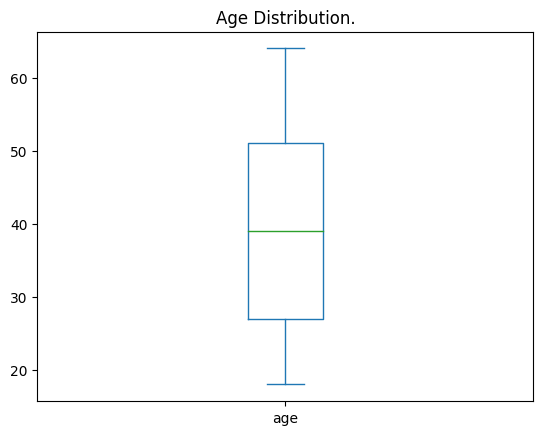

In [ ]:
insurance_df1['age'].plot(kind = 'box')
plt.title("Age Distribution.")
plt.show()

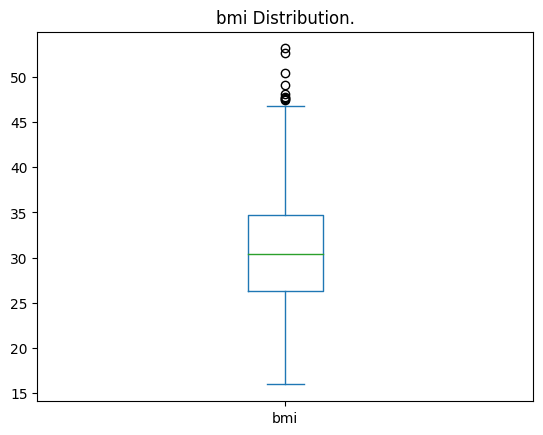

In [ ]:
insurance_df1['bmi'].plot(kind = 'box')
plt.title("bmi Distribution.")
plt.show()

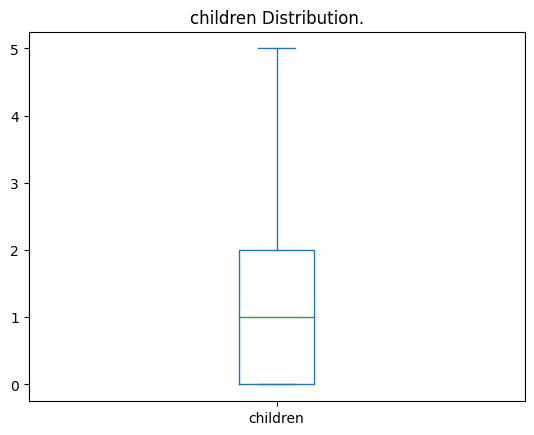

In [ ]:
insurance_df1['children'].plot(kind = 'box')
plt.title("children Distribution.")
plt.show()

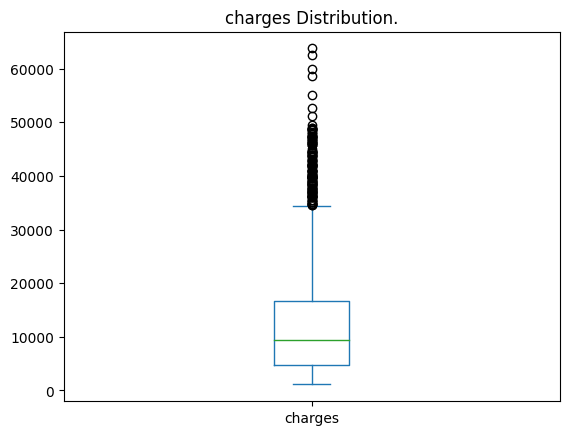

In [ ]:
insurance_df1['charges'].plot(kind = 'box')
plt.title("charges Distribution.")
plt.show()

In [ ]:
region_count = insurance_df1["region"].value_counts()
region_count

,count
region,
southeast,364
southwest,325
northwest,324
northeast,324


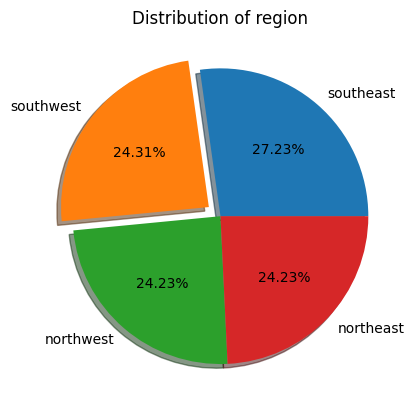

In [ ]:
plt.pie(labels= region_count.index,
        x=region_count.values,
        shadow=True,
        autopct ='%.2f%%',
        explode = (0, 0.1 , 0, 0))
plt.title("Distribution of region")
plt.show()

In [ ]:
corr_data = insurance_df1[["age", "bmi", "charges"]].corr()
corr_data

,age,bmi,charges
age,1.000000,0.109344,0.298308
bmi,0.109344,1.000000,0.198401
charges,0.298308,0.198401,1.000000


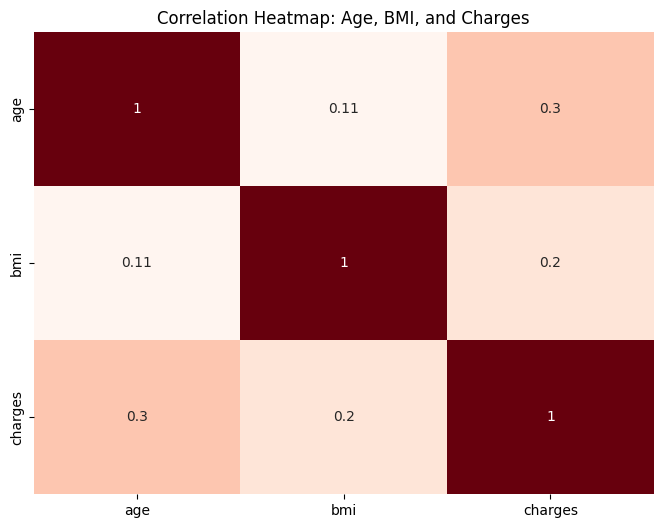

In [ ]:
plt.figure(figsize= (8,6))
sns.heatmap(round(corr_data,2), annot=True, cmap="Reds", cbar=False)
plt.title("Correlation Heatmap: Age, BMI, and Charges")
plt.show()

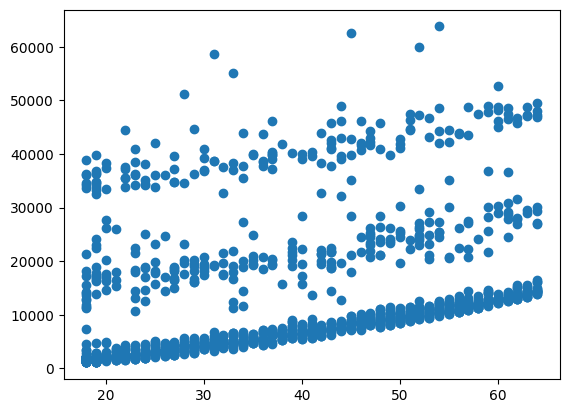

In [ ]:
plt.scatter(data = insurance_df1, x = 'age', y='charges')

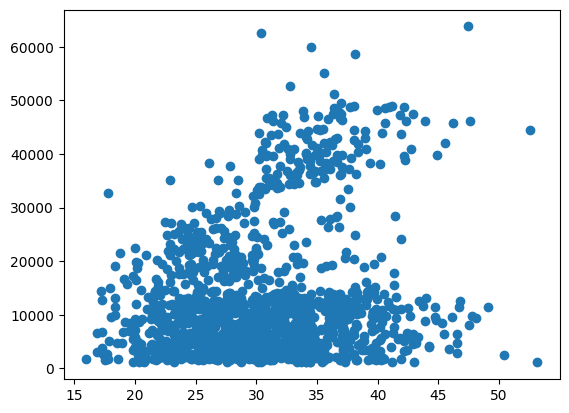

In [ ]:
plt.scatter(data = insurance_df1, x = 'bmi', y='charges')

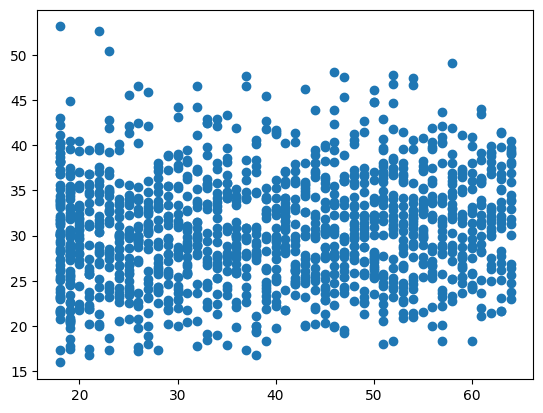

In [ ]:
plt.scatter(data = insurance_df1, x = 'age', y='bmi')

In [ ]:
smoker_df = insurance_df.groupby("smoker")["charges"].mean().reset_index()
smoker_df

,smoker,charges
0,no,8434.268298
1,yes,32050.231832


<Axes: xlabel='smoker'>

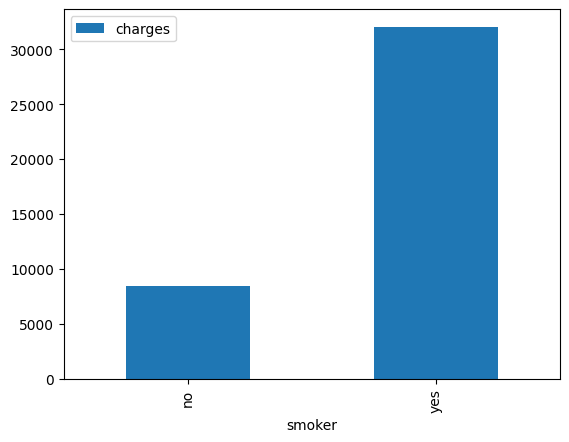

In [ ]:
smoker_df.plot(kind = 'bar', x = 'smoker', y = 'charges')

# MACHINE LEARNING MODEL DEVELOPMENT





In [ ]:
insurance_df1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
#df1 = pd.get_dummies(df['sex'])
#df = pd.concat([df, df1], axis=1).reindex(df.index)

#df.drop('sex', axis=1, inplace=True)


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [ ]:
insurance_df1['sex']= le.fit_transform(insurance_df1['sex'])
insurance_df1['smoker']= le.fit_transform(insurance_df1['smoker'])
insurance_df1['region']= le.fit_transform(insurance_df1['region'])

<ipython-input-51-fa97ace2d7a5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insurance_df1['sex']= le.fit_transform(insurance_df1['sex'])
<ipython-input-51-fa97ace2d7a5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insurance_df1['smoker']= le.fit_transform(insurance_df1['smoker'])
<ipython-input-51-fa97ace2d7a5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [ ]:
insurance_df1

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [ ]:
x = insurance_df1.drop(columns=["charges"], axis=1)
y =insurance_df1["charges"]

In [ ]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
lr_pred = lr.predict(x_test)
lr_pred

array([ 8.08045019e+03,  5.59287112e+03,  1.43782987e+04,  3.17318195e+04,
        9.15835694e+03,  1.33610143e+04,  3.02576553e+04,  1.30864736e+03,
        1.08494254e+04,  1.13755485e+04,  1.04822214e+04,  3.31558608e+04,
        3.09123841e+04,  1.71688443e+04,  1.06361393e+04,  9.37424715e+03,
        3.96524338e+03,  3.19229863e+04,  3.08468457e+03,  5.47544373e+03,
        3.76844305e+03,  3.01552667e+04,  1.50768984e+04,  3.02746510e+04,
        3.10830548e+04,  5.52001772e+03,  3.56655758e+04,  3.63713163e+04,
        1.12979802e+04,  1.40664742e+04,  6.37519963e+03,  1.29381095e+04,
        6.79284837e+02,  1.19476924e+04,  3.97832706e+04,  1.21517558e+04,
        4.57717842e+03,  4.01652351e+03,  3.11475453e+04,  9.22301501e+03,
        6.86852604e+03,  3.00358113e+04,  3.49732855e+04,  1.21709787e+04,
        7.46262777e+03,  3.27014535e+03,  6.02195905e+03,  8.81742438e+03,
        4.32171874e+03,  9.25718479e+03,  6.82679737e+03,  1.18887556e+04,
        3.11350727e+04,  

In [ ]:
accuracy = r2_score(y_test, lr_pred)
accuracy

0.8068466322629112

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
tree = DecisionTreeRegressor()
tree.fit(x_train, y_train)

DecisionTreeRegressor()

In [ ]:
tree_pred = tree.predict(x_test)
tree_pred

array([ 9361.3268 ,  4529.477  , 10848.1343 , 44585.45587, 18963.17192,
        8978.1851 , 36219.40545,  2007.945  ,  7727.2532 , 10407.08585,
       13616.3586 , 23065.4207 , 58571.07448, 13470.86   ,  5989.52365,
        8520.026  ,  4830.63   , 39871.7043 ,  3847.674  ,  3561.8889 ,
        1748.774  , 22331.5668 ,  8978.1851 , 19719.6947 , 37079.372  ,
       26018.95052, 42560.4304 , 46130.5265 ,  9290.1395 , 28468.91901,
        4134.08245,  9386.1613 ,  1720.3537 , 12928.7911 , 47269.854  ,
       10118.424  ,  2913.569  ,  4827.90495, 22218.1149 ,  8240.5896 ,
        2217.46915, 19964.7463 , 41034.2214 ,  9174.13565,  8515.7587 ,
        3353.284  ,  2217.46915,  7633.7206 ,  3956.07145,  6600.361  ,
        4058.1161 ,  7050.0213 , 21880.82   ,  1880.487  ,  7160.3303 ,
        8116.26885,  9617.66245, 12609.88702, 43943.8761 ,  9222.4026 ,
       11299.343  ,  5246.047  , 29186.48236,  1708.0014 , 12485.8009 ,
       13047.33235,  6067.12675, 21774.32215, 17178.6824 , 12347

In [ ]:
tree_accuracy = r2_score(y_test, tree_pred)
tree_accuracy

0.7864244035354158

In [ ]:

age1 =int(input('age: '))
sex = int(input('Gender: For male, enter 1. For female, enter 0: '))
bmi1 = int(input('bmi: '))
cld1 = int(input('children : '))
smoker = int(input('If you are a smoker, enter 1, if not, enter 0: '))
region = int(input('If you are from southeast, enter 1, southwest, enter 2, northwest, enter 3, or northeast, enter 4: '))
age2 = std_scaler.fit_transform([[age1]])
bmi2 = std_scaler.fit_transform([[bmi1]])
cld2 = std_scaler.fit_transform([[cld1]])



print(lr.predict([[age2[0][0],sex,bmi2[0][0], cld2[0][0],smoker,region]]))
print( tree.predict([[age2[0][0],sex,bmi2[0][0], cld2[0][0],smoker,region]]))




age: 30
Gender: For male, enter 1. For female, enter 0: 1
bmi: 70
children : 2
If you are a smoker, enter 1, if not, enter 0: 0
If you are from southeast, enter 1, southwest, enter 2, northwest, enter 3, or northeast, enter 4: 1
[-11385.00709837]
[1621.3402]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
